## Sampling
Simple sampling with pandas

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

First task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
spotify_population = pd.read_feather('/Users/starburned/data_analytics_projects/data/spotify_2000_2020.feather')

In [9]:
spotify_population.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [10]:
len(spotify_population)

41656

In [11]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

In [12]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

In [13]:
mean_dur_pop

3.8521519140900073

In [15]:
# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

In [16]:
mean_dur_samp

3.8617513833333335

In [17]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']
loudness_pop.mean()

-7.366856851353947

In [18]:
# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)
loudness_samp.mean()

-7.4856799999999994

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. Compare the acousticness distribution of the total population of songs with a sample of those songs.

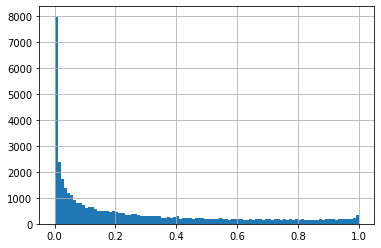

In [20]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01));

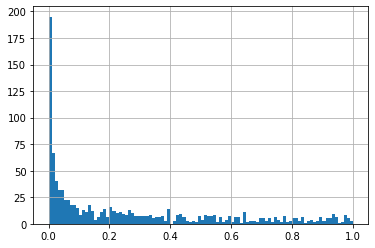

In [24]:
# Update the histogram to use spotify sample
spotify_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01));

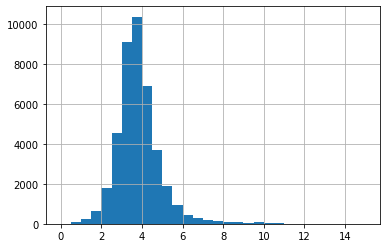

In [26]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5));

In [27]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

In [28]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5,scale=2, size=5000)

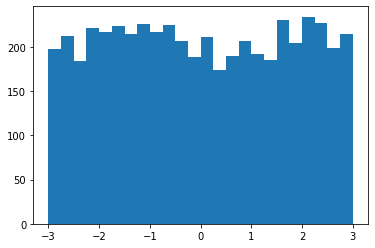

In [35]:
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25));

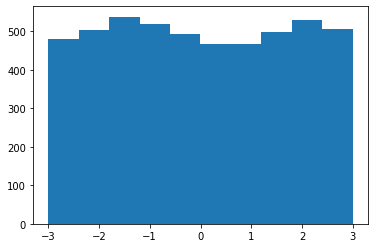

In [37]:
plt.hist(uniforms);

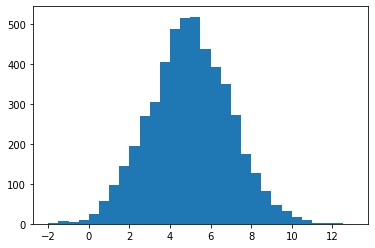

In [39]:
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5));

## Principles of bootstrapping
Bootstrapping is, in some sense, the opposite of sampling from a population. Sampling treats your dataset as the population, and you generate a random subset. Bootstrapping treats your dataset as a sample and uses it to build up a theoretical population.

The bootstrapping workflow is to generate a resample of the same size as the population, calculate a summary statistic, then repeat this to get a distribution of summary statistics.

The key to deciding whether to sample without or with replacement is whether or not your dataset is best thought of as being the whole population or not.

## Generating a bootstrap distribution

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.

In [41]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

In [42]:
# Calculate mean danceability of resample
mean_danceability_1 = spotify_1_resample['danceability'].mean()

In [43]:
mean_danceability_1

0.5810508

In [45]:
# Replicate this 1000 times
mean_danceability_1000 = []
for _ in range(1000):
    mean_danceability_1000.append(np.mean(spotify_sample.sample(frac=1, replace=True)['danceability']))

In [46]:
mean_danceability_1000[:10]

[0.5830684,
 0.5791510999999999,
 0.5760468000000001,
 0.5744999000000001,
 0.5831964,
 0.5724693999999999,
 0.5748418,
 0.5679468999999999,
 0.584563,
 0.5781189]

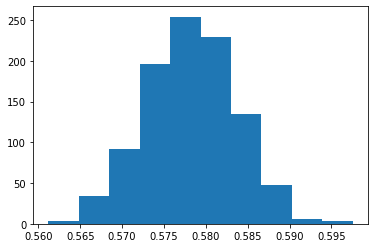

In [47]:
plt.hist(mean_danceability_1000);

From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is

If the sample is not closely representative of the population, then the mean of the bootstrap distribution will not be representative of the population mean. This is less of a problem for standard errors.

## Sampling distribution vs. bootstrap distribution

The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.

Here, the statistic you are interested in is the mean popularity score of the songs.

In [47]:
spotify_sample = spotify_population.sample(n=5000)

In [48]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for _ in range(2000):
    mean_popularity_2000_samp.append(spotify_population.sample(n=5000)['popularity'].mean())

In [9]:
# Print the sampling distribution results
mean_popularity_2000_samp[:10]

[54.85, 54.414, 53.958, 54.526, 54.232, 54.12, 54.524, 55.458, 54.848, 54.75]

In [49]:
# List comprehension
mean_popularity_3000_samp = [spotify_population.sample(n=5000)['popularity'].mean() for _ in range(3000)]

In [11]:
mean_popularity_3000_samp[:10]

[54.752, 54.046, 54.758, 54.468, 54.934, 55.272, 54.88, 55.362, 54.862, 54.56]

In [50]:
# Generate a bootstrap distribution of 2000 replicates, resample 500 rows and calculate the mean popularity
mean_popularity_2000_boot = [spotify_sample.sample(5000, replace=True)['popularity'].mean() for _ in range(2000)]

In [15]:
mean_popularity_2000_boot[:10]

[54.982, 54.058, 55.26, 55.236, 54.9, 54.118, 54.924, 54.71, 54.3, 54.252]

In [51]:
# Generate a bootstrap distribution of 2000 replicates, resample 500 rows and calculate the mean popularity
mean_popularity_5000_boot = [spotify_sample.sample(5000, replace=True)['popularity'].mean() for _ in range(5000)]

## Compare sampling and bootstrap means

In [52]:
spotify_population['popularity'].mean()

54.837142308430955

In [53]:
spotify_sample['popularity'].mean()

54.729

In [54]:
np.mean(mean_popularity_2000_boot)

54.7298737

In [55]:
np.mean(mean_popularity_3000_samp)

54.8378656

The sampling distribution mean is the best estimate of the true population mean; the bootstrap distribution mean is closest to the original sample mean.

## Sampling and bootstrap standard deviations

In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population.

In [56]:
spotify_population['popularity'].std(ddof=0)

10.880065274257536

In [57]:
spotify_sample['popularity'].std(ddof=1)

10.955380553527775

In [58]:
np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(5000)

11.007821419688545

In [60]:
np.std(mean_popularity_3000_samp, ddof=1) * np.sqrt(5000)

10.236797583136996

In [61]:
np.std(mean_popularity_5000_boot, ddof=1) * np.sqrt(5000)

10.993792482033651

When you don't know have all the values from the population or the ability to sample multiple times, you can use bootstrapping to get a good estimate of the population standard deviation.

Confidence intervals account for uncertainty in our estimate of a population parameter by providing a range of possible values. We are confident that the true value lies somewhere in the interval specified by that range.